PCA example, 
Load the iris data

In [0]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Normalize the input variables

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Use PCA to reduce the dimensions of the data

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

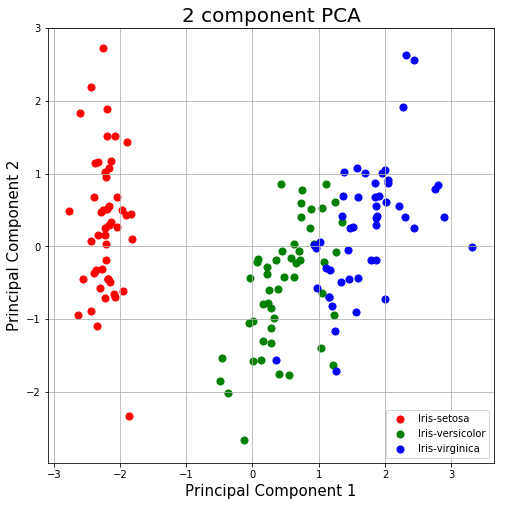

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Display the variances of top two components

In [0]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Load the MNIST data

In [0]:
from sklearn import datasets
mnist = datasets.load_digits()
#mnist = fetch_mldata('MNIST original')

Split data into training set and test set

In [0]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

Standardize the data

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Retain 95% of the PCA components


In [0]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

Use logistic regression to do prediction

In [0]:
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])
logisticRegr.score(test_img, test_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9571984435797666

Compare the original handwriting number image and pca reduced version of the same image

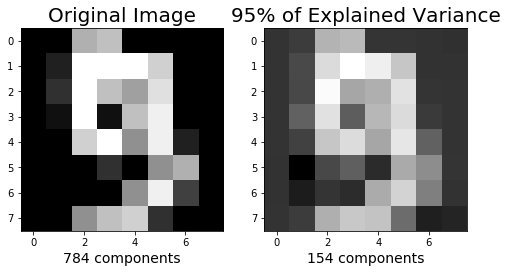

In [0]:
lower_dimensional_data = pca.fit_transform(mnist.data)
pca.n_components_
approximation = pca.inverse_transform(lower_dimensional_data)
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[9].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest',
              );
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[9].reshape(8, 8),
              cmap = plt.cm.gray, interpolation='nearest',
              );
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);